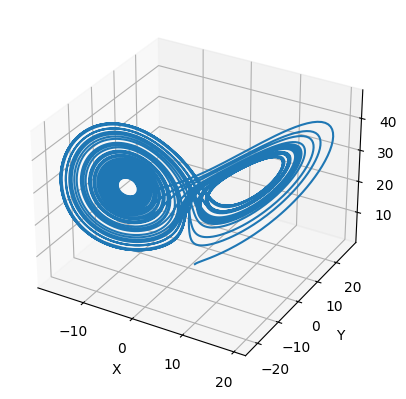

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the Lorentz system
def lorentz_system(state, t, sigma, beta, rho):
    x, y, z = state
    dxdt = sigma * (y - x)
    dydt = x * (rho - z) - y
    dzdt = x * y - beta * z
    return [dxdt, dydt, dzdt]

# Parameters
sigma = 10.0
beta = 8.0 / 3.0
rho = 28.0

# Initial state
initial_state = [1.0, 1.0, 1.0]

# Time points
t = np.linspace(0, 50, 10000)

# Solve ODE
solution = odeint(lorentz_system, initial_state, t, args=(sigma, beta, rho))

# Plot the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(solution[:, 0], solution[:, 1], solution[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

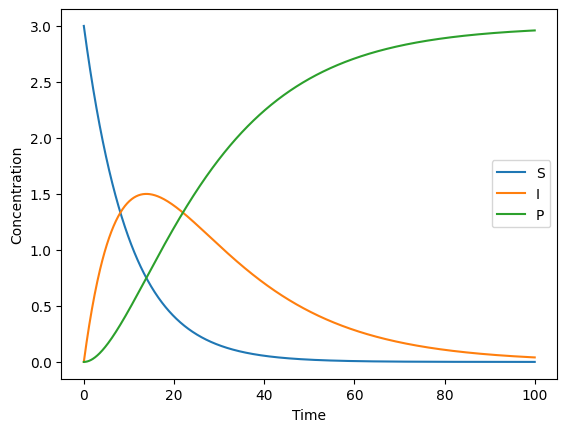

In [3]:
# Define the biochemical cascade system
def cascade_system(state, t, k1, k2):
    S, I, P = state
    dSdt = -k1 * S
    dIdt = k1 * S - k2 * I
    dPdt = k2 * I
    return [dSdt, dIdt, dPdt]

# Parameters
k1 = 0.1  # rate constant for the first reaction
k2 = 0.05  # rate constant for the second reaction

# Initial state
initial_state_cascade = [3.0, 0.0, 0.0]  # initial concentrations of S, I, and P

# Time points
t_cascade = np.linspace(0, 100, 1000)

# Solve ODE
solution_cascade = odeint(cascade_system, initial_state_cascade, t_cascade, args=(k1, k2))

# Plot the results
plt.figure()
plt.plot(t_cascade, solution_cascade[:, 0], label='S')
plt.plot(t_cascade, solution_cascade[:, 1], label='I')
plt.plot(t_cascade, solution_cascade[:, 2], label='P')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

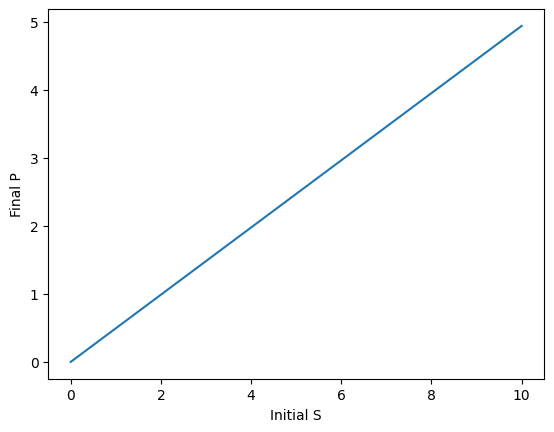

In [6]:
# Define the modified biochemical cascade system
def modified_cascade_system(state, t, k1, k2, k3):
    S, I, P = state
    dSdt = -k1 * S
    dIdt = k1 * S - k2 * I
    dPdt = k2 * I - k3 * P
    return [dSdt, dIdt, dPdt]

# Parameters
k1 = 0.1  # rate constant for the first reaction
k2 = 0.05  # rate constant for the second reaction
k3 = 0.01  # rate constant for the third reaction

# Initial state
initial_state_modified = [1.0, 0.0, 0.0]  # initial concentrations of S, I, and P

# Time points
t_modified = np.linspace(0, 100, 1000)

# Solve ODE
solution_modified = odeint(modified_cascade_system, initial_state_modified, t_modified, args=(k1, k2, k3))

# Polynomial relationship check
initial_S = initial_state_modified[0]
final_P = solution_modified[-1, 2]


# generate a list of initial S values
initial_S_values = np.linspace(0, 10, 100)

# calculate the final P values for each initial S value
final_P_values = []
for initial_S in initial_S_values:
    initial_state_modified = [initial_S, 0.0, 0.0]
    solution_modified = odeint(modified_cascade_system, initial_state_modified, t_modified, args=(k1, k2, k3))
    final_P = solution_modified[-1, 2]
    final_P_values.append(final_P)
    
# Plot the results
plt.figure()
plt.plot(initial_S_values, final_P_values)
plt.xlabel('Initial S')
plt.ylabel('Final P')
plt.show()

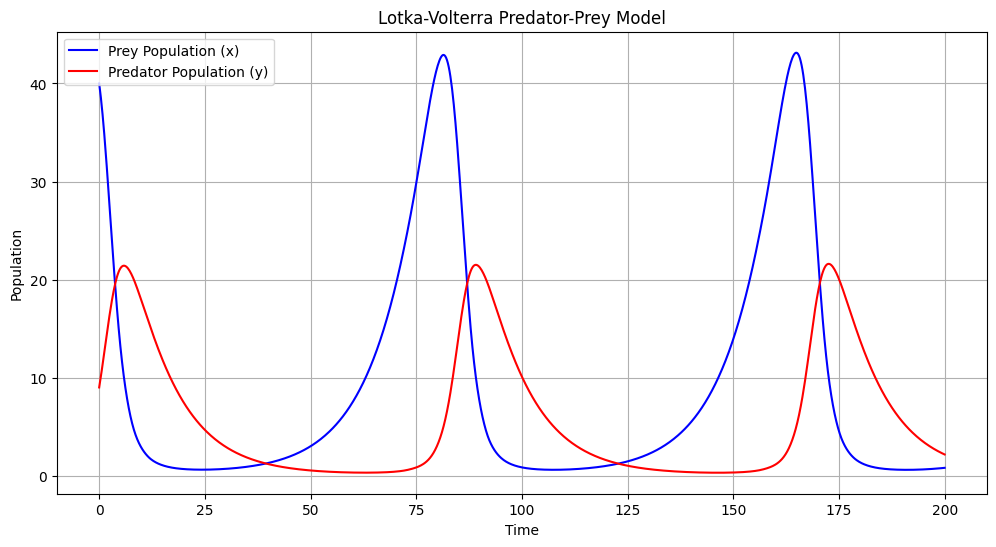

In [7]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define parameters for the Lotka-Volterra model
alpha = 0.1  # Prey birth rate
beta = 0.02  # Predation rate
delta = 0.01  # Predator reproduction rate due to predation
gamma = 0.1   # Predator death rate

# Define the system of ODEs for the Lotka-Volterra model


def lotka_volterra(t, z):
    x, y = z
    dxdt = alpha * x - beta * x * y
    dydt = delta * x * y - gamma * y
    return [dxdt, dydt]


# Initial conditions for prey (x) and predator (y) populations
initial_conditions = [40, 9]

# Time span for the simulation
t_span = (0, 200)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the system of ODEs
solution = solve_ivp(lotka_volterra, t_span, initial_conditions, t_eval=t_eval)

# Plotting the solution
plt.figure(figsize=(12, 6))

# Plot prey and predator populations over time
plt.plot(solution.t, solution.y[0], label="Prey Population (x)", color="b")
plt.plot(solution.t, solution.y[1], label="Predator Population (y)", color="r")
plt.xlabel("Time")
plt.ylabel("Population")
plt.title("Lotka-Volterra Predator-Prey Model")
plt.legend()
plt.grid(True)
plt.show()

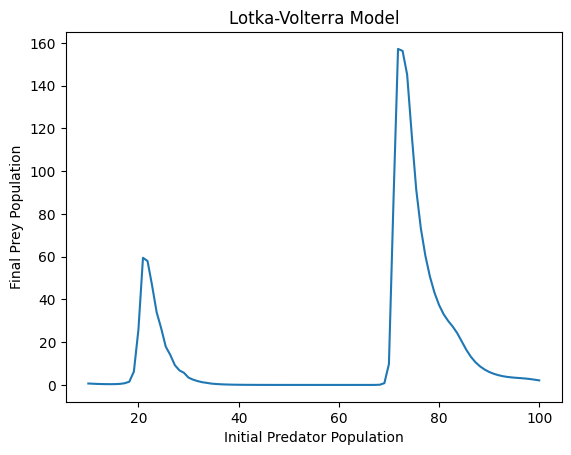

In [12]:
initial_predator_values = np.linspace(10, 100, 100)
final_prey_values = []

for initial_predator in initial_predator_values:
    initial_conditions = [40, initial_predator]
    solution = solve_ivp(lotka_volterra, t_span, initial_conditions, t_eval=t_eval)
    final_prey = solution.y[0][-1]
    final_prey_values.append(final_prey)
    
    
plt.figure()
plt.plot(initial_predator_values, final_prey_values)
plt.xlabel('Initial Predator Population')
plt.ylabel('Final Prey Population')
plt.title('Lotka-Volterra Model')
plt.show()


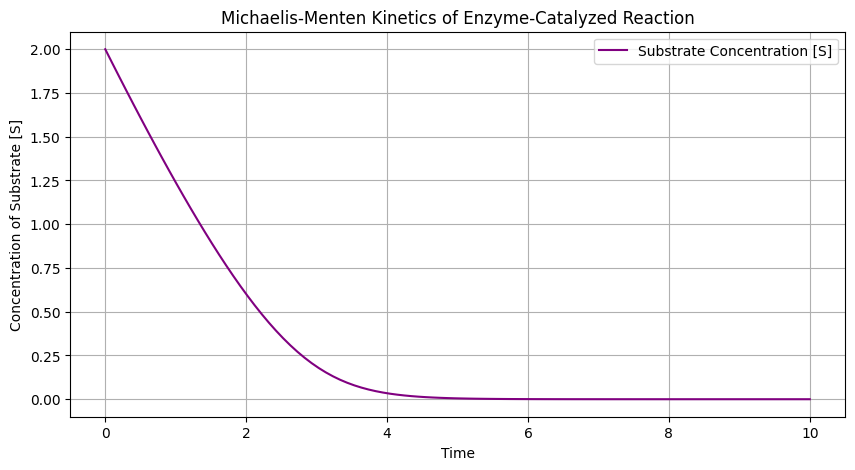

In [5]:
# Re-import necessary libraries after reset
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define parameters for the Michaelis-Menten kinetics model
V_max = 1.0   # Maximum reaction rate
K_m = 0.5     # Michaelis constant

# Define the Michaelis-Menten rate law for substrate concentration
def michaelis_menten(t, S):
    dSdt = -V_max * S / (K_m + S)  # Rate of change of substrate concentration
    return [dSdt]

# Initial concentration of the substrate
initial_substrate_concentration = [2]

# Time span for the simulation
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 100)

# Solve the ODE
solution_mm = solve_ivp(michaelis_menten, t_span, initial_substrate_concentration, t_eval=t_eval)

# Plotting the solution
plt.figure(figsize=(10, 5))
plt.plot(solution_mm.t, solution_mm.y[0], label="Substrate Concentration [S]", color="purple")
plt.xlabel("Time")
plt.ylabel("Concentration of Substrate [S]")
plt.title("Michaelis-Menten Kinetics of Enzyme-Catalyzed Reaction")
plt.legend()
plt.grid(True)
plt.show()


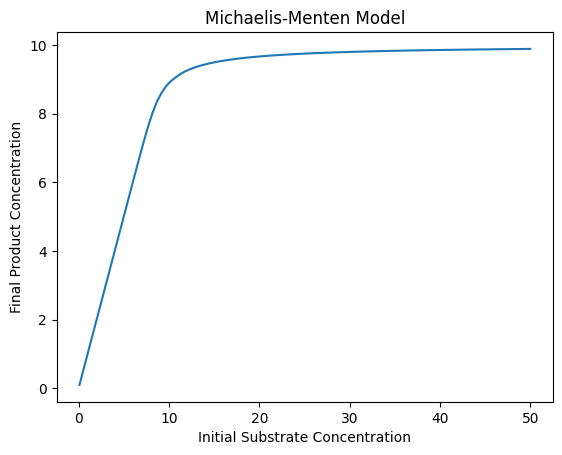

In [3]:
# perform initial value to final product concentration analysis

initial_substrate_values = np.linspace(0.1, 50, 100)
final_product_values = []

for initial_substrate in initial_substrate_values:
    initial_substrate_concentration = [initial_substrate]
    solution_mm = solve_ivp(michaelis_menten, t_span, initial_substrate_concentration, t_eval=t_eval)
    final_product = initial_substrate - solution_mm.y[0][-1]
    final_product_values.append(final_product)
    
plt.figure()
plt.plot(initial_substrate_values, final_product_values)
plt.xlabel('Initial Substrate Concentration')
plt.ylabel('Final Product Concentration')
plt.title('Michaelis-Menten Model')
plt.show()


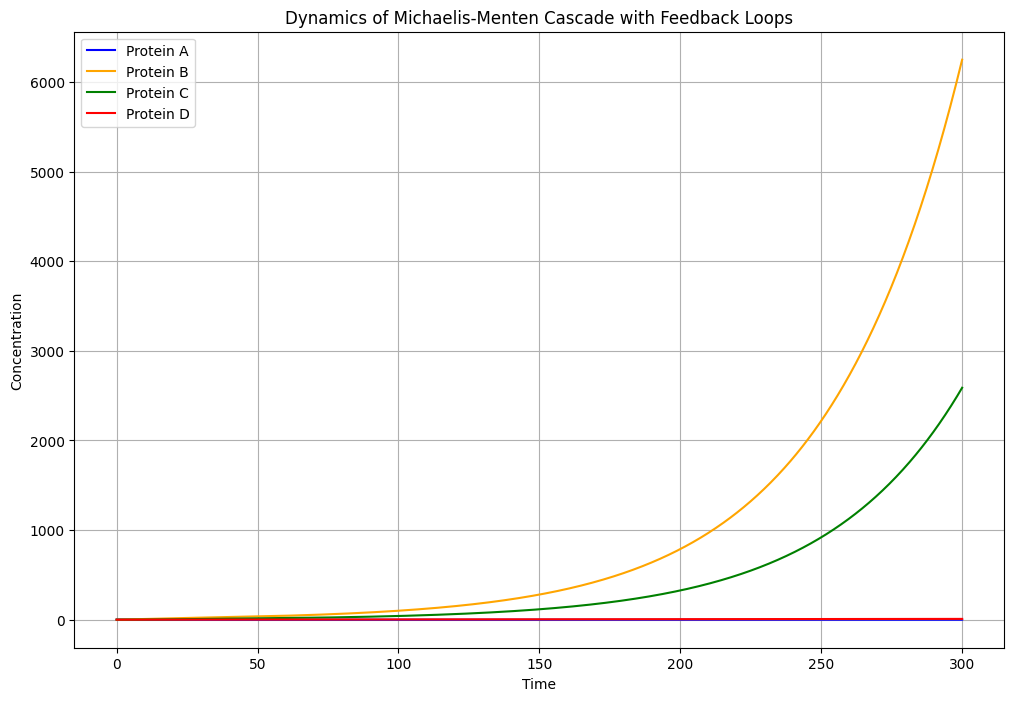

In [14]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define parameters for the system
V_max = 1.0         # Maximum rate for Michaelis-Menten reaction (A -> B)
K_mA = 0.5          # Michaelis constant for A
k_positive = 0.05   # Rate constant for positive feedback loop (B -> C)
k_negative = 0.03   # Rate constant for negative feedback loop (C -> D -> inhibit B)
K_mD = 0.5          # Michaelis constant for inhibition by D
k_decay = 0.1       # Degradation rate for C
k_A = 0.1           # Decay rate of A

# Define the system of ODEs
def system_of_odes(t, variables):
    A, B, C, D = variables
    
    # Equations
    dA_dt = -k_A * A / (K_mA + A)
    dB_dt = (V_max * A / (K_mA + A)) + k_positive * C - k_negative * D / (K_mD + D)
    dC_dt = k_positive * B - k_decay * C
    dD_dt = k_negative * C / (K_mD + C)
    
    return [dA_dt, dB_dt, dC_dt, dD_dt]

# Initial conditions for A, B, C, D
initial_conditions = [2, 0.5, 0.5, 0.5]

# Time span for the simulation
t_span = (0, 300)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the system of ODEs
solution = solve_ivp(system_of_odes, t_span, initial_conditions, t_eval=t_eval)

# Plotting the solution
plt.figure(figsize=(12, 8))
plt.plot(solution.t, solution.y[0], label="Protein A", color="blue")
plt.plot(solution.t, solution.y[1], label="Protein B", color="orange")
plt.plot(solution.t, solution.y[2], label="Protein C", color="green")
plt.plot(solution.t, solution.y[3], label="Protein D", color="red")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("Dynamics of Michaelis-Menten Cascade with Feedback Loops")
plt.legend()
plt.grid(True)
plt.show()


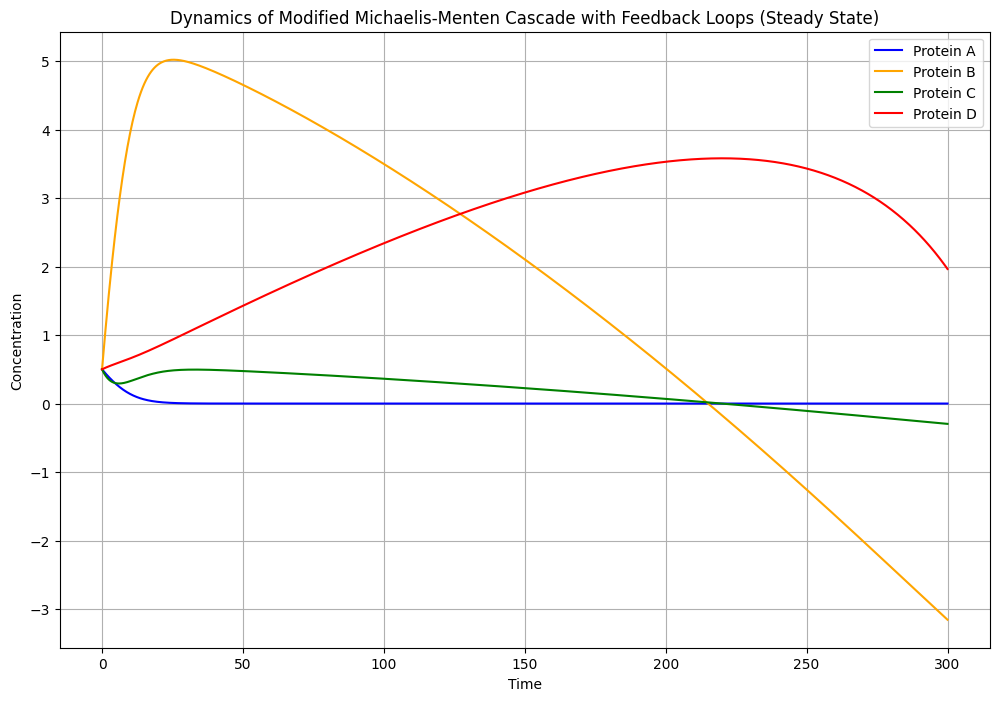

In [16]:
# Modify parameters to help B and C reach a steady state
# Increase k_decay for C to enhance degradation and lower the positive feedback effect

V_max = 1.0         # Maximum rate for Michaelis-Menten reaction (A -> B)
K_mA = 0.5          # Michaelis constant for A
k_positive = 0.02   # Decreased rate constant for positive feedback loop (B -> C)
k_negative = 0.04   # Increased rate constant for negative feedback loop (C -> D -> inhibit B)
K_mD = 0.5          # Michaelis constant for inhibition by D
k_decay = 0.2       # Increased degradation rate for C to limit its growth
k_A = 0.1           # Decay rate of A

# Initial conditions for A, B, C, D
initial_conditions = [0.5, 0.5, 0.5, 0.5]

# Time span for the simulation
t_span = (0, 300)
t_eval = np.linspace(t_span[0], t_span[1], 1000)

# Solve the system of ODEs again with updated parameters
solution = solve_ivp(system_of_odes, t_span, initial_conditions, t_eval=t_eval)

# Plotting the solution with modified parameters
plt.figure(figsize=(12, 8))
plt.plot(solution.t, solution.y[0], label="Protein A", color="blue")
plt.plot(solution.t, solution.y[1], label="Protein B", color="orange")
plt.plot(solution.t, solution.y[2], label="Protein C", color="green")
plt.plot(solution.t, solution.y[3], label="Protein D", color="red")
plt.xlabel("Time")
plt.ylabel("Concentration")
plt.title("Dynamics of Modified Michaelis-Menten Cascade with Feedback Loops (Steady State)")
plt.legend()
plt.grid(True)
plt.show()

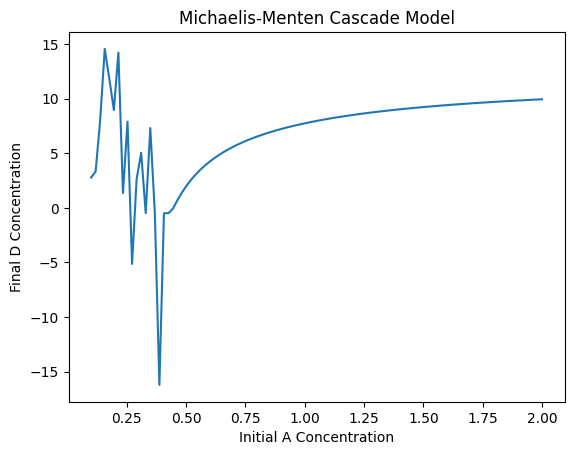

In [10]:
# perform initial value to final product concentration analysis from initial value of A to final value of D

initial_A_values = np.linspace(0.1, 2, 100)
final_D_values = []

for initial_A in initial_A_values:
    initial_conditions = [initial_A, 0.5, 0.5, 0.5]
    solution = solve_ivp(system_of_odes, t_span, initial_conditions, t_eval=t_eval)
    final_D = solution.y[3][-1]
    final_D_values.append(final_D)
    
plt.figure()
plt.plot(initial_A_values, final_D_values)
plt.xlabel('Initial A Concentration')
plt.ylabel('Final D Concentration')
plt.title('Michaelis-Menten Cascade Model')
plt.show()


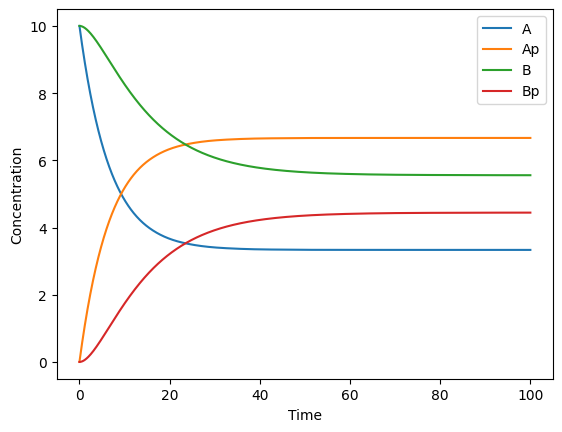

In [19]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define parameters
k_phos = 0.1  # Phosphorylation rate of A to Ap
k_dephos = 0.05  # Dephosphorylation rate of Ap to A
k_B_to_Bp = 0.1  # Conversion rate of B to Bp
k_Bp_to_B = 0.05  # Conversion rate of Bp to B
K_m = 10.0  # Michaelis constant for Ap affecting B to Bp conversion

# Define the system of ODEs
def system_of_odes(t, variables):
    A, Ap, B, Bp = variables
    
    # Equations
    dA_dt = -k_phos * A + k_dephos * Ap
    dAp_dt = k_phos * A - k_dephos * Ap
    dB_dt = -k_B_to_Bp * B * Ap / (K_m + Ap) + k_Bp_to_B * Bp
    dBp_dt = k_B_to_Bp * B * Ap / (K_m + Ap) - k_Bp_to_B * Bp
    
    return [dA_dt, dAp_dt, dB_dt, dBp_dt]

# Initial conditions
initial_conditions = [10, 0, 10, 0]

# Time span
t_span = (0, 100)
t_eval = np.linspace(*t_span, 1000)

# Solve the system of ODEs
solution = solve_ivp(system_of_odes, t_span, initial_conditions, t_eval=t_eval)

# Plot the results
plt.plot(solution.t, solution.y[0], label='A')
plt.plot(solution.t, solution.y[1], label='Ap')
plt.plot(solution.t, solution.y[2], label='B')
plt.plot(solution.t, solution.y[3], label='Bp')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

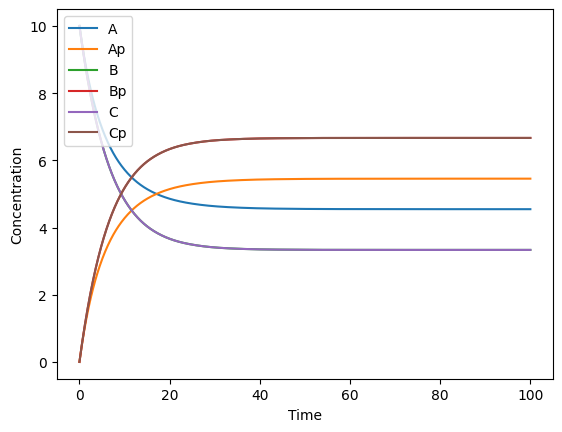

In [21]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define parameters
k_phos_A = 0.1  # Phosphorylation rate of A to Ap
k_dephos_A = 0.05  # Dephosphorylation rate of Ap to A
k_phos_B = 0.1  # Phosphorylation rate of B to Bp
k_dephos_B = 0.05  # Dephosphorylation rate of Bp to B
k_phos_C = 0.1  # Phosphorylation rate of C to Cp
k_dephos_C = 0.05  # Dephosphorylation rate of Cp to C
K_m_A = 10.0  # Michaelis constant for Cp affecting A to Ap conversion

# Define the system of ODEs
def system_of_odes(t, variables):
    A, Ap, B, Bp, C, Cp = variables
    
    # Equations
    dA_dt = -k_phos_A * A / (1 + Cp / K_m_A) + k_dephos_A * Ap
    dAp_dt = k_phos_A * A / (1 + Cp / K_m_A) - k_dephos_A * Ap
    dB_dt = -k_phos_B * B + k_dephos_B * Bp
    dBp_dt = k_phos_B * B - k_dephos_B * Bp
    dC_dt = -k_phos_C * C + k_dephos_C * Cp
    dCp_dt = k_phos_C * C - k_dephos_C * Cp
    
    return [dA_dt, dAp_dt, dB_dt, dBp_dt, dC_dt, dCp_dt]

# Initial conditions
initial_conditions = [10, 0, 10, 0, 10, 0]

# Time span
t_span = (0, 100)
t_eval = np.linspace(*t_span, 1000)

# Solve the system of ODEs
solution = solve_ivp(system_of_odes, t_span, initial_conditions, t_eval=t_eval)

# Plot the results
plt.plot(solution.t, solution.y[0], label='A')
plt.plot(solution.t, solution.y[1], label='Ap')
plt.plot(solution.t, solution.y[2], label='B')
plt.plot(solution.t, solution.y[3], label='Bp')
plt.plot(solution.t, solution.y[4], label='C')
plt.plot(solution.t, solution.y[5], label='Cp')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

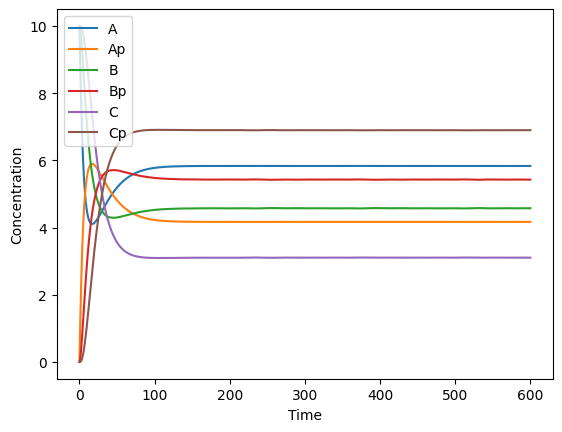

In [40]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Randomized parameters
k_phos_A = 0.12  # Phosphorylation rate of A to Ap
k_dephos_A = 0.03  # Dephosphorylation rate of Ap to A
k_phos_B = 0.15  # Phosphorylation rate of B to Bp
k_dephos_B = 0.04  # Dephosphorylation rate of Bp to B
k_phos_C = 0.2  # Phosphorylation rate of C to Cp
k_dephos_C = 0.02  # Dephosphorylation rate of Cp to C
K_m_A = 1.5  # Michaelis constant for Cp affecting A to Ap conversion
K_m_B = 9.0  # Michaelis constant for Ap affecting B to Bp conversion
K_m_C = 19.0  # Michaelis constant for Bp affecting C to Cp conversion

# Define the system of ODEs
def system_of_odes(t, variables):
    A, Ap, B, Bp, C, Cp = variables
    
    # Equations
    dA_dt = -k_phos_A * A / (1 + Cp / K_m_A) + k_dephos_A * Ap
    dAp_dt = k_phos_A * A / (1 + Cp / K_m_A) - k_dephos_A * Ap
    dB_dt = -k_phos_B * B * Ap / (K_m_B + Ap) + k_dephos_B * Bp
    dBp_dt = k_phos_B * B * Ap / (K_m_B + Ap) - k_dephos_B * Bp
    dC_dt = -k_phos_C * C * Bp / (K_m_C + Bp) + k_dephos_C * Cp
    dCp_dt = k_phos_C * C * Bp / (K_m_C + Bp) - k_dephos_C * Cp
    
    return [dA_dt, dAp_dt, dB_dt, dBp_dt, dC_dt, dCp_dt]

# Initial conditions
initial_conditions = [10, 0, 10, 0, 10, 0]

# Time span
t_span = (0, 600)
t_eval = np.linspace(*t_span, 1000)

# Solve the system of ODEs
solution = solve_ivp(system_of_odes, t_span, initial_conditions, t_eval=t_eval)

# Plot the results
plt.plot(solution.t, solution.y[0], label='A')
plt.plot(solution.t, solution.y[1], label='Ap')
plt.plot(solution.t, solution.y[2], label='B')
plt.plot(solution.t, solution.y[3], label='Bp')
plt.plot(solution.t, solution.y[4], label='C')
plt.plot(solution.t, solution.y[5], label='Cp')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

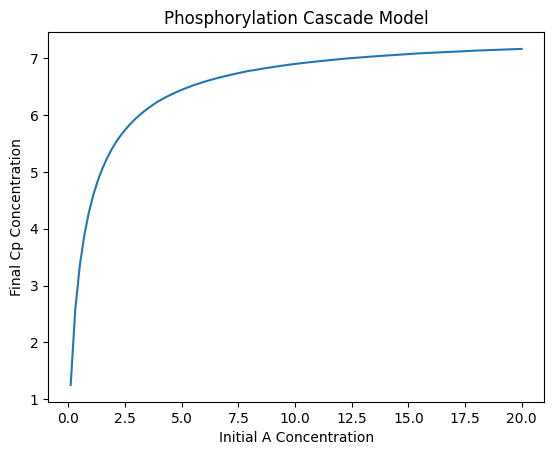

In [42]:
# perform initial value to final product concentration analysis from initial value of A to final value of Cp

initial_A_values = np.linspace(0.1, 20, 100)
final_Cp_values = []

for initial_A in initial_A_values:
    initial_conditions = [initial_A, 0, 10, 0, 10, 0]
    solution = solve_ivp(system_of_odes, t_span, initial_conditions, t_eval=t_eval)
    final_Cp = solution.y[5][-1]
    final_Cp_values.append(final_Cp)
    
plt.figure()
plt.plot(initial_A_values, final_Cp_values)
plt.xlabel('Initial A Concentration')
plt.ylabel('Final Cp Concentration')
plt.title('Phosphorylation Cascade Model')
plt.show()

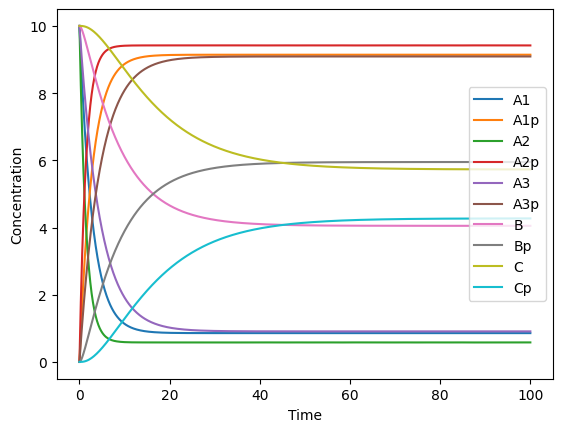

In [53]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Randomized parameters
k_phos_A1 = 0.32  # Phosphorylation rate of A1 to A1p
k_dephos_A1 = 0.03  # Dephosphorylation rate of A1p to A1
k_phos_A2 = 0.65  # Phosphorylation rate of A2 to A2p
k_dephos_A2 = 0.04  # Dephosphorylation rate of A2p to A2
k_phos_A3 = 0.2  # Phosphorylation rate of A3 to A3p
k_dephos_A3 = 0.02  # Dephosphorylation rate of A3p to A3
k_phos_B = 0.1  # Phosphorylation rate of B to Bp
k_dephos_B = 0.05  # Dephosphorylation rate of Bp to B
k_phos_C = 0.1  # Phosphorylation rate of C to Cp
k_dephos_C = 0.05  # Dephosphorylation rate of Cp to C
K_m_B = 10.0  # Michaelis constant for A1p, A2p, A3p affecting B to Bp conversion
K_m_C = 10.0  # Michaelis constant for Bp affecting C to Cp conversion

# Define the system of ODEs


def system_of_odes(t, variables):
    A1, A1p, A2, A2p, A3, A3p, B, Bp, C, Cp = variables

    # Equations
    dA1_dt = -k_phos_A1 * A1 + k_dephos_A1 * A1p
    dA1p_dt = k_phos_A1 * A1 - k_dephos_A1 * A1p
    dA2_dt = -k_phos_A2 * A2 + k_dephos_A2 * A2p
    dA2p_dt = k_phos_A2 * A2 - k_dephos_A2 * A2p
    dA3_dt = -k_phos_A3 * A3 + k_dephos_A3 * A3p
    dA3p_dt = k_phos_A3 * A3 - k_dephos_A3 * A3p
    dB_dt = -k_phos_B * B * (A1p + A2p + A3p) / \
        (K_m_B + A1p + A2p + A3p) + k_dephos_B * Bp
    dBp_dt = k_phos_B * B * (A1p + A2p + A3p) / \
        (K_m_B + A1p + A2p + A3p) - k_dephos_B * Bp
    dC_dt = -k_phos_C * C * Bp / (K_m_C + Bp) + k_dephos_C * Cp
    dCp_dt = k_phos_C * C * Bp / (K_m_C + Bp) - k_dephos_C * Cp

    return [dA1_dt, dA1p_dt, dA2_dt, dA2p_dt, dA3_dt, dA3p_dt, dB_dt, dBp_dt, dC_dt, dCp_dt]


# Initial conditions
initial_conditions = [10, 0, 10, 0, 10, 0, 10, 0, 10, 0]

# Time span
t_span = (0, 100)
t_eval = np.linspace(*t_span, 1000)

# Solve the system of ODEs
solution = solve_ivp(system_of_odes, t_span, initial_conditions, t_eval=t_eval)

# Plot the results
plt.plot(solution.t, solution.y[0], label='A1')
plt.plot(solution.t, solution.y[1], label='A1p')
plt.plot(solution.t, solution.y[2], label='A2')
plt.plot(solution.t, solution.y[3], label='A2p')
plt.plot(solution.t, solution.y[4], label='A3')
plt.plot(solution.t, solution.y[5], label='A3p')
plt.plot(solution.t, solution.y[6], label='B')
plt.plot(solution.t, solution.y[7], label='Bp')
plt.plot(solution.t, solution.y[8], label='C')
plt.plot(solution.t, solution.y[9], label='Cp')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

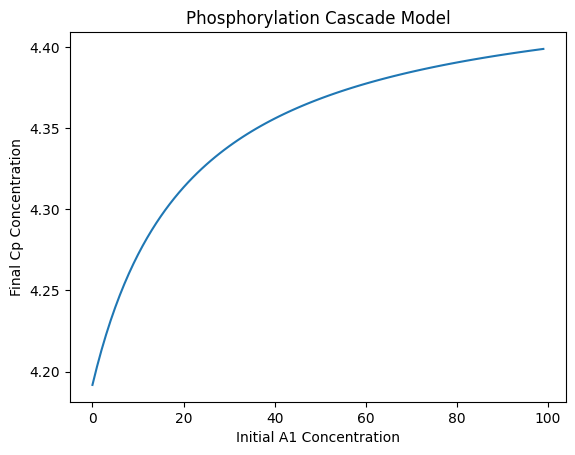

In [54]:
# # perform initial value to final product concentration analysis from initial value of A1, A2 and A3 to final value of Cp

initial_A1_values = np.linspace(0.1, 100, 100)

final_Cp_values = []

for initial_A1 in initial_A1_values:
        initial_conditions = [initial_A1, 0, 10, 0, 10, 0, 10, 0, 10, 0]
        solution = solve_ivp(system_of_odes, t_span, initial_conditions, t_eval=t_eval)
        final_Cp = solution.y[9][-1]
        final_Cp_values.append(final_Cp)
            
plt.figure()
plt.plot(final_Cp_values)
plt.xlabel('Initial A1 Concentration')
plt.ylabel('Final Cp Concentration')
plt.title('Phosphorylation Cascade Model')
plt.show()


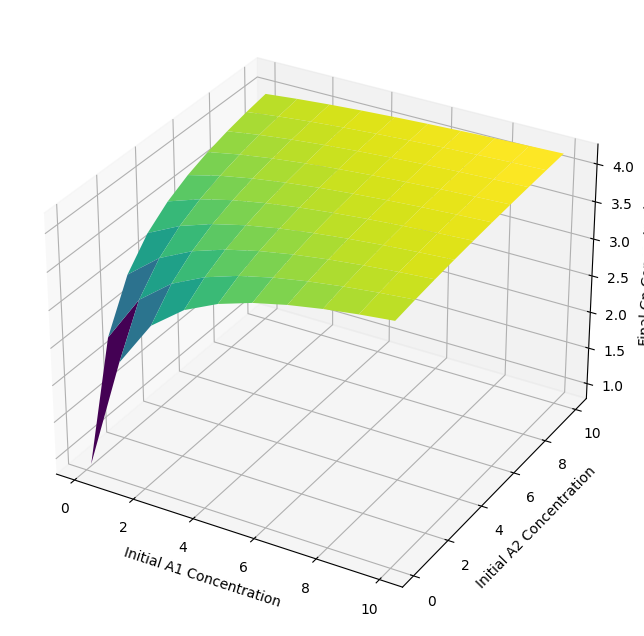

In [56]:
# create a 3D plot and perturbate A1, A2 and A3 concentrations at start to observe the effect on Cp concentration at final time point

from mpl_toolkits.mplot3d import Axes3D

# Perturbate A1, A2, A3 concentrations

initial_A1_values = np.linspace(0.1, 10, 10)
initial_A2_values = np.linspace(0.1, 10, 10)
initial_A3_values = np.linspace(0.1, 10, 10)

final_Cp_values = np.zeros((10, 10, 10))

for i, initial_A1 in enumerate(initial_A1_values):
    for j, initial_A2 in enumerate(initial_A2_values):
        for k, initial_A3 in enumerate(initial_A3_values):
            initial_conditions = [initial_A1, 0, initial_A2, 0, initial_A3, 0, 10, 0, 10, 0]
            solution = solve_ivp(system_of_odes, t_span, initial_conditions, t_eval=t_eval)
            final_Cp = solution.y[9][-1]
            final_Cp_values[i, j, k] = final_Cp
            
# Plot the results for a fixed initial_A3 value (e.g., the first value in initial_A3_values)
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
A1, A3 = np.meshgrid(initial_A1_values, initial_A2_values)
surf = ax.plot_surface(A1, A3, final_Cp_values[:, :, 0], cmap='viridis')
ax.set_xlabel('Initial A1 Concentration')
ax.set_ylabel('Initial A2 Concentration')
ax.set_zlabel('Final Cp Concentration')
plt.show()
